#  Import Libraries

In [104]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

# Load Train Dataset

In [2]:
# loading the training dataset
train_data = pd.read_csv(r"C:\Users\Venkat sai\Desktop\archive (10)\train.csv")

In [3]:
train_data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3248,FDR25,17.000,Regular,0.139805,Canned,265.7884,OUT045,2002,NaN,Tier 2,Supermarket Type1,3974.8260
4587,FDS48,15.150,Low Fat,0.027774,Baking Goods,152.3708,OUT035,2004,Small,Tier 2,Supermarket Type1,3159.8868
1605,NCG43,20.200,Low Fat,0.124262,Household,93.6462,OUT010,1998,NaN,Tier 3,Grocery Store,277.6386
7004,FDW12,8.315,Regular,0.035644,Baking Goods,147.1444,OUT045,2002,NaN,Tier 2,Supermarket Type1,870.8664
6123,FDD09,13.500,low fat,0.021618,Fruits and Vegetables,179.6976,OUT017,2007,NaN,Tier 2,Supermarket Type1,1810.9760
8024,NCP50,17.350,Low Fat,0.020556,Others,79.4618,OUT035,2004,Small,Tier 2,Supermarket Type1,1772.3596
7737,FDS11,NaN,Regular,0.055289,Breads,222.5088,OUT027,1985,Medium,Tier 3,Supermarket Type3,7158.6816
7884,FDW46,13.000,Regular,0.070288,Snack Foods,64.3484,OUT035,2004,Small,Tier 2,Supermarket Type1,2218.4456
778,FDM52,15.100,Low Fat,0.026046,Frozen Foods,147.2076,OUT045,2002,NaN,Tier 2,Supermarket Type1,1773.6912
7336,FDZ59,6.630,Regular,0.104445,Baking Goods,167.2500,OUT018,2009,Medium,Tier 3,Supermarket Type2,1830.9500


# Load Test Dataset

In [4]:
#loading the tesgt dataset
test_data = pd.read_csv(r"C:\Users\Venkat sai\Desktop\archive (10)\test.csv")

In [5]:
test_data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1237,FDQ25,8.630,Regular,0.028253,Canned,170.4422,OUT013,1987,High,Tier 3,Supermarket Type1
3967,FDY26,20.600,Regular,0.030485,Dairy,210.7244,OUT013,1987,High,Tier 3,Supermarket Type1
2931,FDU48,18.850,Low Fat,0.055312,Baking Goods,131.4284,OUT013,1987,High,Tier 3,Supermarket Type1
5313,FDW10,21.200,Low Fat,0.070663,Snack Foods,177.0370,OUT035,2004,Small,Tier 2,Supermarket Type1
4430,DRF51,15.750,LF,0.166776,Dairy,36.5506,OUT017,2007,NaN,Tier 2,Supermarket Type1
5453,FDZ59,6.630,Regular,0.104610,Baking Goods,168.3500,OUT017,2007,NaN,Tier 2,Supermarket Type1
1167,FDM01,7.895,Regular,0.000000,Breakfast,102.4332,OUT045,2002,NaN,Tier 2,Supermarket Type1
3514,DRF25,9.000,Low Fat,0.039084,Soft Drinks,35.4190,OUT018,2009,Medium,Tier 3,Supermarket Type2
3227,FDY13,NaN,Low Fat,0.029982,Canned,77.8670,OUT027,1985,Medium,Tier 3,Supermarket Type3
4402,DRH39,20.700,Low Fat,0.092878,Dairy,75.1670,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [6]:
# Checking the null values in train dataset
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Getting the information about the train  dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
# Filling the null values with medain of that column 
train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(),inplace=True)

In [19]:
# Again checking the null values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
# Mode of a particular column
train_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [21]:
# Filling null values with mode of that column data
train_data['Outlet_Size'].fillna("Medium",inplace=True)

In [22]:
# Again checking tht null values 
train_data['Outlet_Size'].isnull().sum()

0

In [23]:
# Checking the value counts for the particular column
train_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [24]:
# Checking the value count of a particular column
train_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

# LabelEncoding

In [25]:
# importing the label encoder from sklearn library
from sklearn.preprocessing import LabelEncoder

In [26]:
# Creating the object for the labelencoder
le = LabelEncoder()

In [27]:
# Label ecoding for the particular column in the dataset
train_data['Outlet_Type'] = le.fit_transform(train_data['Outlet_Type'])

In [28]:
# Label ecoding for the particular column in the dataset
train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])

In [29]:
# Label ecoding for the particular column in the dataset
train_data['Outlet_Size'] = le.fit_transform(train_data['Outlet_Size'])

In [30]:
# Label ecoding for the particular column in the dataset
train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])

In [31]:
# Label ecoding for the particular column in the dataset
train_data['Item_Type'] = le.fit_transform(train_data['Item_Type'])

In [32]:
# Getting the sample data from the train dataset
train_data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1682,FDB15,10.895000,1,0.136697,4,264.5568,OUT013,1987,0,2,1,5536.7928
6778,NCB19,12.857645,1,0.089858,9,84.5882,OUT027,1985,1,2,3,2061.3168
895,FDB15,10.895000,1,0.136811,4,263.0568,OUT046,1997,2,0,1,527.3136
2838,FDH05,12.857645,2,0.090473,5,229.7984,OUT027,1985,1,2,3,6024.1584
3786,FDJ44,12.300000,2,0.106929,6,173.7396,OUT017,2007,1,1,1,3663.2316
3904,NCM43,14.500000,1,0.019506,11,163.9210,OUT049,1999,1,0,1,2446.8150
2668,FDV16,7.750000,2,0.082915,5,34.9558,OUT035,2004,2,1,1,645.1602
7262,FDP58,11.100000,1,0.000000,13,220.7482,OUT049,1999,1,0,1,4380.9640
6178,FDP56,8.185000,3,0.046578,6,48.6692,OUT045,2002,1,1,1,1182.4608
5990,FDQ07,12.857645,2,0.086984,6,219.8456,OUT027,1985,1,2,3,1547.3192


In [34]:
# droping the columns from the train dataset and assigning the remaining columns to the variable x
x = train_data.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [35]:
# shape of the variable x
x.shape

(8523, 9)

In [37]:
# Size of the variable x
x.size

76707

In [38]:
# Finding the traget variable to predict
target_variable = train_data['Item_Outlet_Sales']

In [39]:
test_data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4842,DRD12,6.96,Low Fat,0.129206,Soft Drinks,89.5146,OUT010,1998,NaN,Tier 3,Grocery Store
2302,FDF22,NaN,Low Fat,0.099503,Snack Foods,212.5218,OUT019,1985,Small,Tier 1,Grocery Store
4164,NCY54,8.43,Low Fat,0.178419,Household,171.1422,OUT018,2009,Medium,Tier 3,Supermarket Type2
1172,FDP51,NaN,Regular,0.084862,Meat,120.0124,OUT027,1985,Medium,Tier 3,Supermarket Type3
211,NCC55,NaN,LF,0.111641,Household,38.8848,OUT019,1985,Small,Tier 1,Grocery Store
3643,NCG18,15.30,Low Fat,0.023025,Household,104.0332,OUT045,2002,NaN,Tier 2,Supermarket Type1
4094,NCY29,13.65,LF,0.129274,Health and Hygiene,55.9930,OUT010,1998,NaN,Tier 3,Grocery Store
1301,FDS01,11.60,Low Fat,0.029701,Canned,179.3686,OUT010,1998,NaN,Tier 3,Grocery Store
4115,NCF30,17.00,Low Fat,0.126500,Household,127.8362,OUT045,2002,NaN,Tier 2,Supermarket Type1
1073,FDD38,16.75,Regular,0.008225,Canned,102.1674,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [40]:
# checking the null values
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [41]:
# Filling the null values by their medain and mode in test dataset
test_data['Item_Weight'].fillna(test_data['Item_Weight'].median(),inplace=True)
test_data['Outlet_Size'].fillna("Medium",inplace=True)

In [42]:
# Checking the null values in test dataset
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [78]:
# describing about the test dataset
rain_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Fat_Content,8523.0,1.369354,0.644810,0.000,1.000000,1.000000,2.000000,4.000000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000
Outlet_Type,8523.0,1.201220,0.796459,0.000,1.000000,1.000000,1.000000,3.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [81]:
# dropiing the object type varibles/columns to find the correraltion 
train_data_corr=train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [82]:
# Creating the oject for the correlation
corr = train_data_corr.corr()

<Axes: >

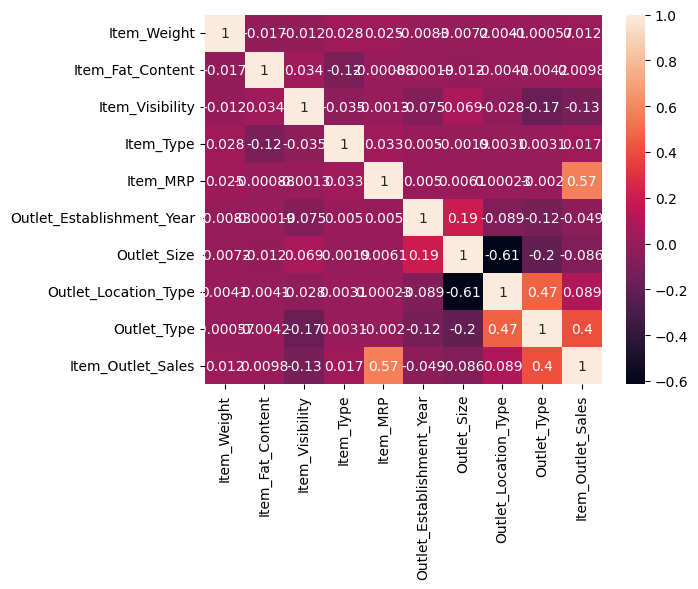

In [84]:
# visualizing the correlation map 
sns.heatmap(corr,annot=True)

In [85]:
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


# Data Visualization

In [86]:
# Selecting only object data type coulmns for data visualization
object=train_data.select_dtypes(include='object').columns
object

Index(['Item_Identifier', 'Outlet_Identifier'], dtype='object')

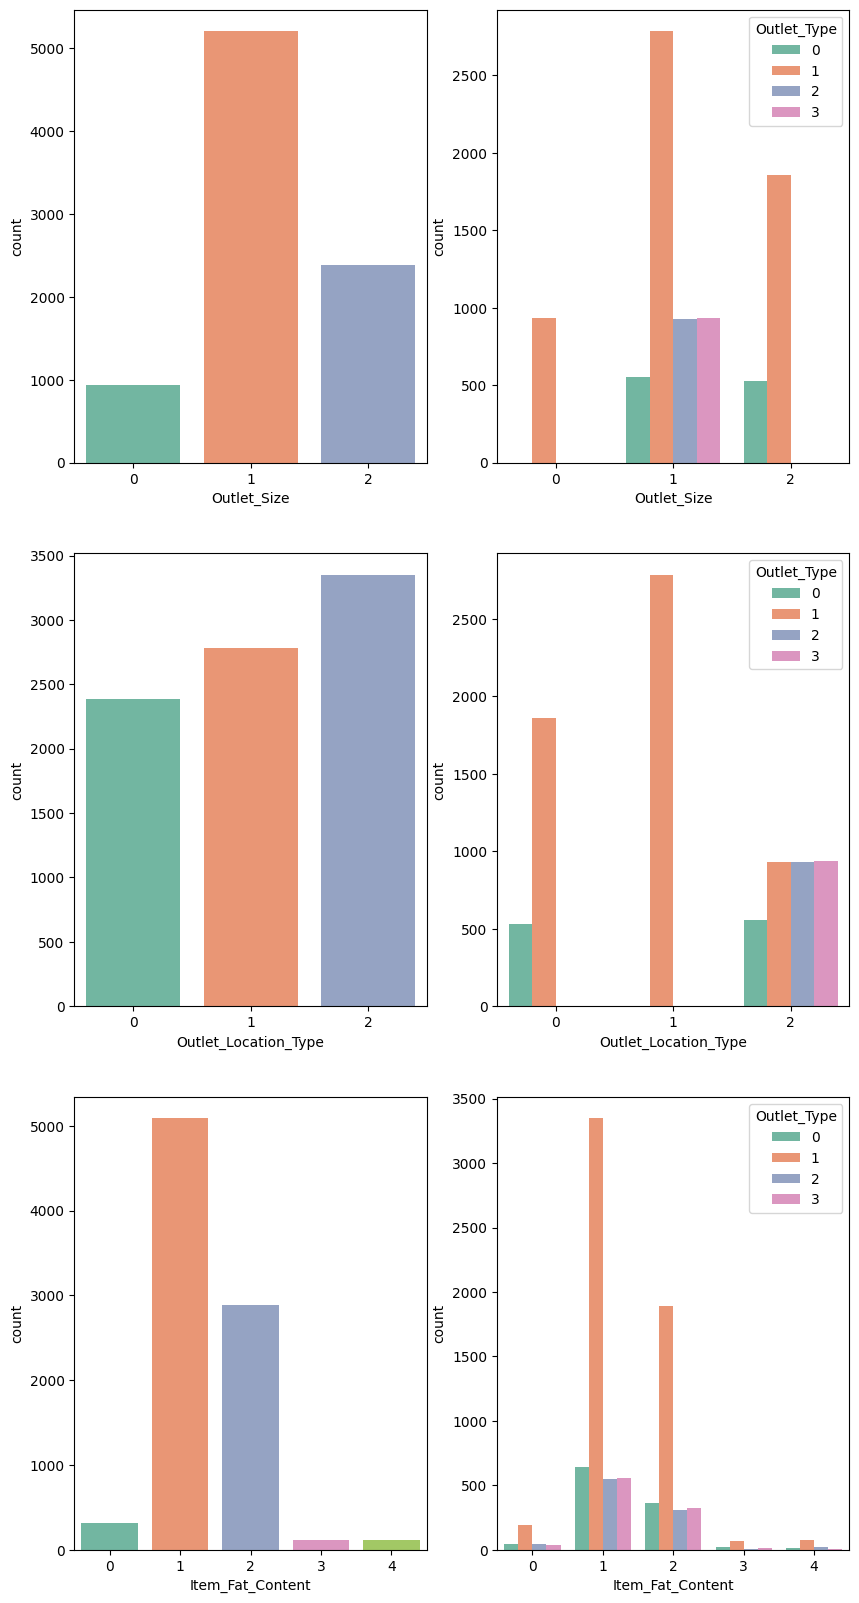

In [89]:
plt.figure(figsize=(10,20))
i=1
for col in ['Outlet_Size', 'Outlet_Location_Type','Item_Fat_Content']:
    plt.subplot(3,2,i)
    sns.countplot(x=col,data=train_data,palette='Set2')
    i+=1
    plt.subplot(3,2,i)
    sns.countplot(x=col,hue='Outlet_Type',data=train_data,palette='Set2')
    i+=1

C:\Users\Venkat sai\AppData\Local\Temp\ipykernel_33336\3315942940.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Outlet_Establishment_Year',data=train_data,palette='Set2')
C:\Users\Venkat sai\AppData\Local\Temp\ipykernel_33336\3315942940.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_Outlet_Sales',data=train_data,palette='Set2')
C:\Users\Venkat sai\AppData\Local\Temp\ipykernel_33336\3315942940.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_Weight',data=train_data,palette='Set2')
C:\Users\Venkat sai\AppData\Local\Temp\ipykernel_33336\3315942940.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Item_Visibility',data=train_data,palette='Set2')
C:\Users\Venkat sai\AppData\Local\Temp\ipykernel_33336\3315942940.py:11: UserWarning: Ignoring `palette` because no `hue` variable h

<Axes: xlabel='Item_MRP', ylabel='Density'>

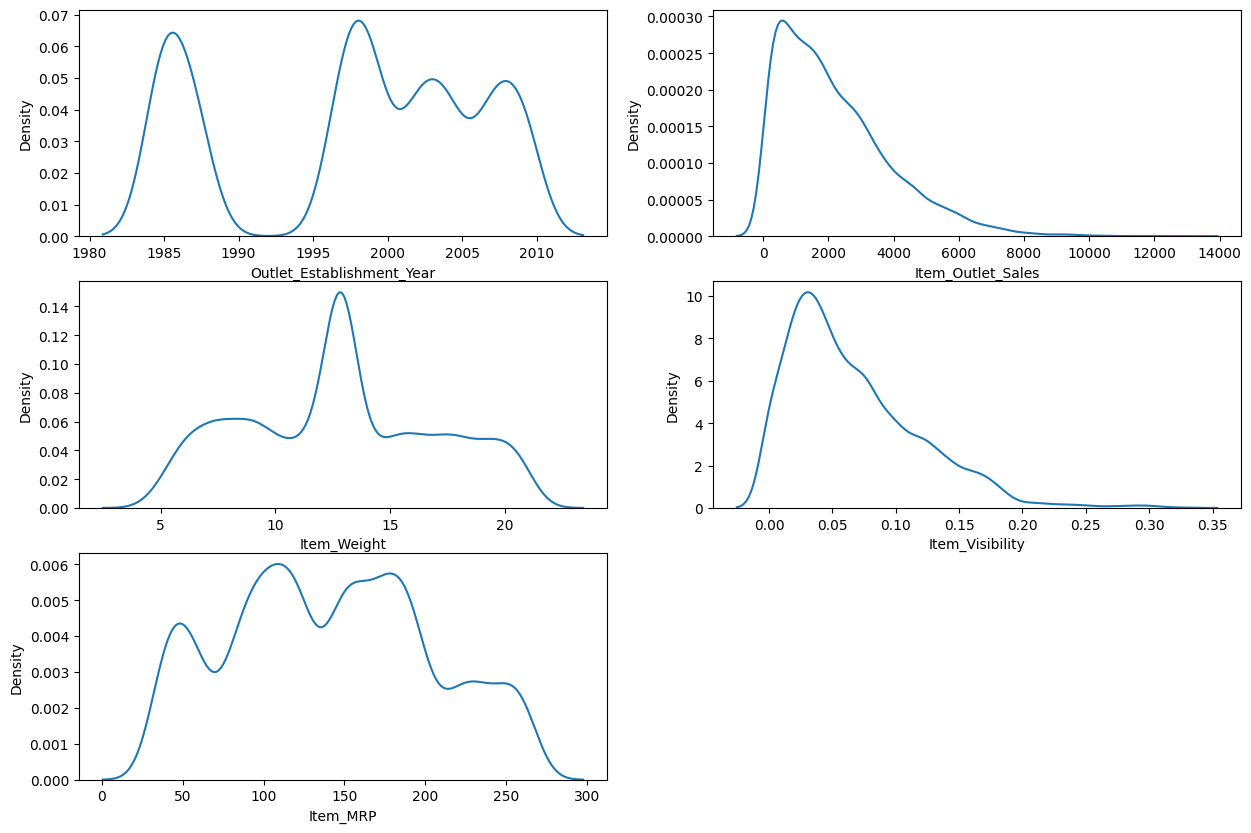

In [90]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.kdeplot(x='Outlet_Establishment_Year',data=train_data,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='Item_Outlet_Sales',data=train_data,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Item_Weight',data=train_data,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Item_Visibility',data=train_data,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='Item_MRP',data=train_data,palette='Set2')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

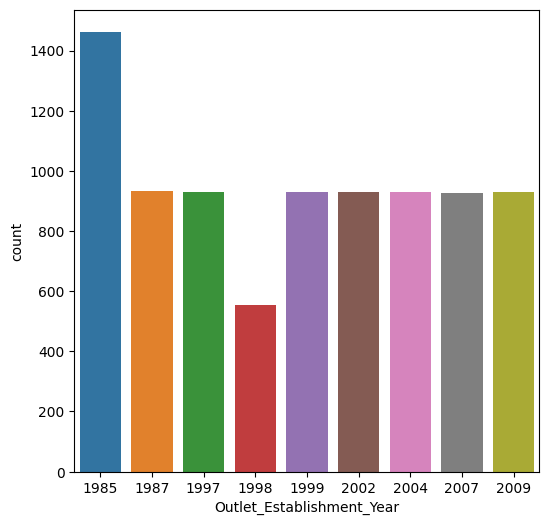

In [92]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_data)

<Axes: xlabel='Item_Type', ylabel='count'>

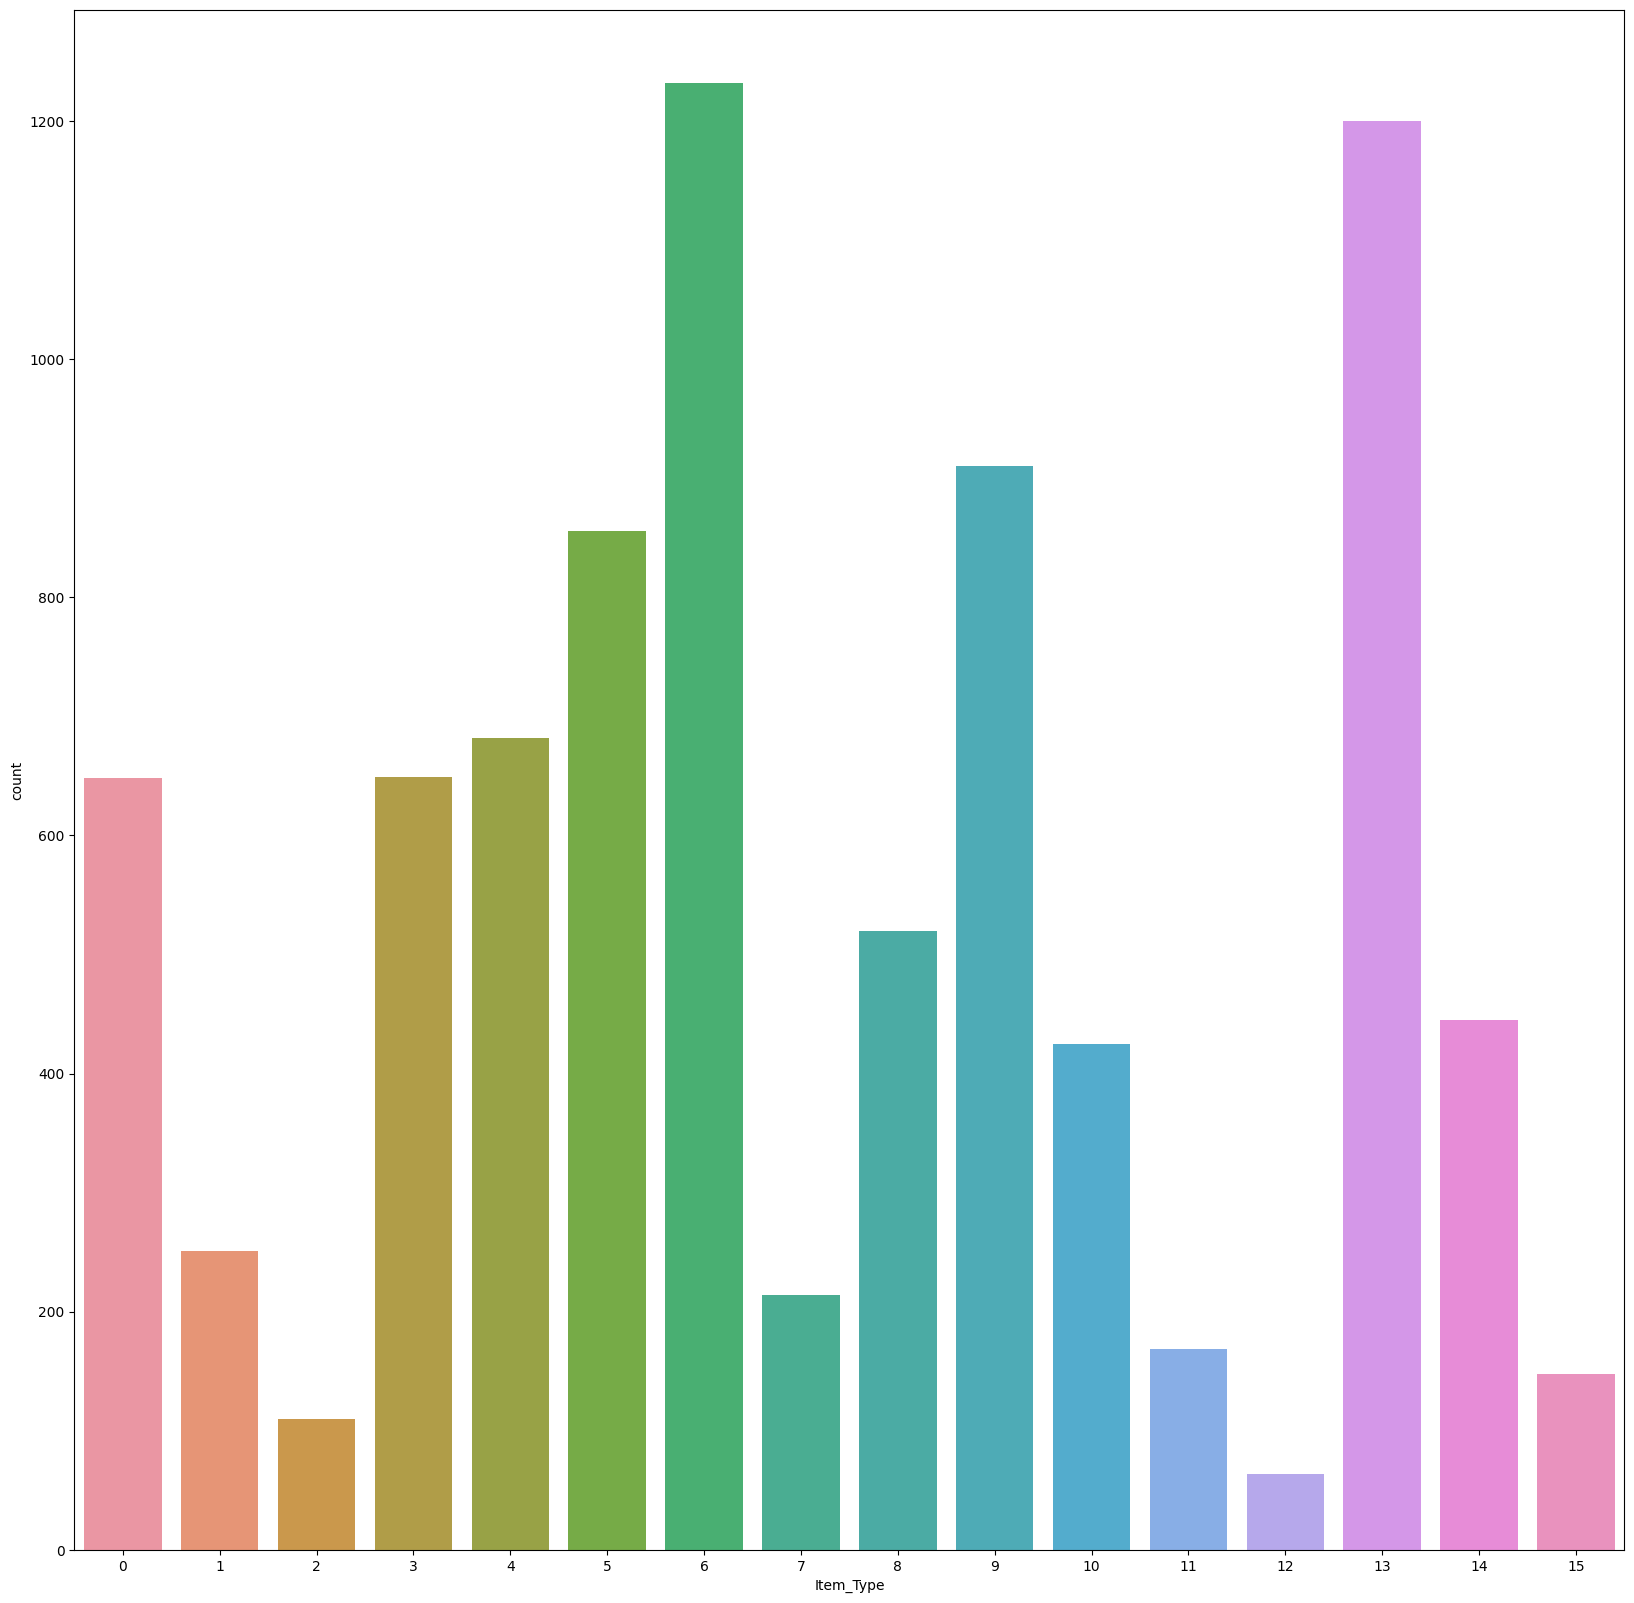

In [98]:
plt.figure(figsize=(20,20))
sns.countplot(x='Item_Type', data=train_data)

# Spliting the train and test dataset

In [44]:
# importing th etraintest split from sklearn
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,target_variable,test_size= 0.20, random_state=42)

In [56]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
reg.predict(x_test)

array([ 738.159144,  820.425392,  722.033468, ...,  742.620004,
        588.620464, 1527.971052])

In [59]:
rfr_reg=RandomForestRegressor(n_estimators=200)
rfr_reg.fit(x_train,y_train)

y_rfreg = rfr_reg.predict(x_test)

In [60]:
MSE=mean_squared_error(y_test,y_rfreg)
MAE=mean_absolute_error(y_test,y_rfreg)
r2=r2_score(y_test,y_rfreg)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.563855585087546
Root Mean Squared Error :  1088.7733760770025
Mean Absolute Error :  759.2858507642228


In [103]:
print('Random Forest Regressor Train Score is : ' , rfr_reg.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , rfr_reg.score(x_test, y_test))


Random Forest Regressor Train Score is :  0.938525304886483
Random Forest Regressor Test Score is :  0.563855585087546


In [62]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# OrdinalEncodeing

In [64]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [65]:
test_data["Outlet_Type"] = ord_enc.fit_transform(test_data[["Outlet_Type"]])
test_data['Outlet_Location_Type'] =ord_enc.fit_transform(test_data[["Outlet_Location_Type"]])
test_data['Outlet_Size'] =ord_enc.fit_transform(test_data[["Outlet_Size"]])
test_data['Item_Fat_Content'] =ord_enc.fit_transform(test_data[["Item_Fat_Content"]])
test_data['Item_Type'] =ord_enc.fit_transform(test_data[["Item_Type"]])

In [68]:
test_data.drop('Outlet_Establishment_Year',axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1.0,0.007565,13.0,107.8622,OUT049,1.0,0.0,1.0
1,FDW14,8.300,4.0,0.038428,4.0,87.3198,OUT017,1.0,1.0,1.0
2,NCN55,14.600,1.0,0.099575,11.0,241.7538,OUT010,1.0,2.0,0.0
3,FDQ58,7.315,1.0,0.015388,13.0,155.0340,OUT017,1.0,1.0,1.0
4,FDY38,12.500,2.0,0.118599,4.0,234.2300,OUT027,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2.0,0.013496,13.0,141.3154,OUT046,2.0,0.0,1.0
5677,FDD47,7.600,2.0,0.142991,15.0,169.1448,OUT018,1.0,2.0,2.0
5678,NCO17,10.000,1.0,0.073529,8.0,118.7440,OUT045,1.0,1.0,1.0
5679,FDJ26,15.300,2.0,0.000000,3.0,214.6218,OUT017,1.0,1.0,1.0


In [69]:
test = test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [71]:
item_sales = reg.predict(test)

In [72]:
final = pd.DataFrame(data=test_data ,columns =("Item_Identifier","Outlet_Identifier"))

In [105]:
final

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


If you want to predict sales depending on this dataset prediction use below code

In [ ]:
new_data = pd.read_csv('new_data.csv')  # Replace 'new_data.csv' with your new data for prediction
new_predictions = model.predict(new_data)

print("Sales Predictions for New Data:", new_predictions)